# Web APIs
![Section Title: Web APIs](title_pict/web_api2.png)
API stands for Application Programming Interface. It basically connects applications to work together and share information.
- Web APIs enable applications to communicate with each other over the internet by sending and receiving data. 
- For example, you can request stock price information from [Yahoo Finance](https://finance.yahoo.com/), weather details from [OpenWeather](https://openweathermap.org/), or Twitter messages from X (formerly Twitter).
- Some API services are completely free and can be used without any setup. Others require you to create an account and obtain an API key, even if they are free. Many APIs offer limited free usage, with additional charges for higher usage.
- On the landing pages of many websites, you can often find a link to their API information.
- Python provides several libraries for working with Web APIs. In this chapter, we will primarily use *urllib*.


### JSON
JSON stands for JavaScript Object Notation. It is a text-based format used to store structured data. 
- JSON is commonly used for exchanging data between applications, making it easy to transmit information across different systems.
- At first, it may seem complicated, long, and messy, but JSON is actually very easy to read.
- It is composed of key-value pairs, where each key is associated with a value.
- JSON can be used with any programming language.
- Below is an example of how data appears in JSON format:

In [3]:
fhand = open('json_sample.txt')
for line in fhand:
    print(line)

{

 "cells": [

  {

   "cell_type": "markdown",

   "id": "d8712b3b-783d-4fee-b9d9-65c3178feb7f",

   "metadata": {},

   "source": [

    "# Numpy Arrays\n",

    "![](title_pict/numpy2.png)"

   ]

  },

  {

   "cell_type": "markdown",

   "id": "7d557bc0-854e-4690-a83d-fbbb8a904085",

   "metadata": {},

   "source": [

    "## Missing Parts\n",

    "- Vectorized Operations"

   ]

  },





## Example: Advice Slip
[https://adviceslip.com/](https://adviceslip.com/) is a website that provides advice.
- Its API can be used to request advice programmatically.
- For more information about their API services, visit the following link: [Advice Slip API Documentation](https://api.adviceslip.com/).

The following libraries will be required:

In [6]:
import urllib.request
import json

### Random Advice

To receive a random advice, the following [URL](https://api.adviceslip.com/advice) will be used, as provided on the [website](https://api.adviceslip.com/):

In [9]:
url = 'https://api.adviceslip.com/advice'

In the following code, urllib.request.urlopen() opens the webpage with the given URL (called API endpoint):

- It sends an HTTP request to the URL and retrieves the response from the server.
- It returns a response object, which contains the server's response to the request.
- This response object can be used to access the content, status code, headers, and other details of the server's response.

In [11]:
response = urllib.request.urlopen(url)
response

In [12]:
type(response)

http.client.HTTPResponse

- You can then read the content from the response using a for loop line by line or methods like read().

In [14]:
for line in response:
    print(line)

b'{"slip": { "id": 84, "advice": "Never set an alarm clock unless you know how to switch it off"}}'


In [15]:
response = urllib.request.urlopen(url)
response.read()

b'{"slip": { "id": 190, "advice": "Don\'t always believe what you think."}}'

- The type of the line returned by urllib.request.urlopen() is bytes.
- The *read()* method also returns a byte object.
- You can use *decode()* method to convert it to a string.
- To work with the content as a string, you need to decode the bytes.

In [17]:
response = urllib.request.urlopen(url)

for line in response:
    print(f'response: {line.decode()} \n\nTYPE: {type(line.decode())}')

response: {"slip": { "id": 145, "advice": "Always the burrito."}} 

TYPE: <class 'str'>


In [18]:
response = urllib.request.urlopen(url)
response.read().decode()

'{"slip": { "id": 170, "advice": "Remedy tickly coughs with a drink of honey, lemon and water as hot as you can take."}}'

- *json.loads()* is used to convert the response into a Python dictionary.
- This makes it easier to access and manipulate the content of the response, as you can use key-value pairs.

In [20]:
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())
data

{'slip': {'id': 205,
  'advice': "Try to not compliment people on things they don't control."}}

In [21]:
type(data)

dict

- In the data dictionary, there is a key-value pair where the key is 'slip', and the corresponding value is another dictionary. 

In [23]:
data['slip']

{'id': 205,
 'advice': "Try to not compliment people on things they don't control."}

- The second (inner) dictionary contains two key-value pairs with the keys: 'id' and 'advice'.
- To access the id number and the advice, you can use the following code:

In [25]:
data['slip']['id']

205

In [26]:
data['slip']['advice']

"Try to not compliment people on things they don't control."

Since access issues to URLs are common, it's recommended to use a try-except statement to handle any potential errors.
- This allows the code to handle exceptions such as network errors or HTTP errors without crashing.

In [28]:
import urllib.request
import json

url = 'https://api.adviceslip.com/advice'

try:
    response = urllib.request.urlopen(url)
    data = json.loads(response.read().decode())
    print(f' ID: {data["slip"]["id"]} --- ADVICE: {data["slip"]["advice"]}')
except :
    print(f'Error')

 ID: 61 --- ADVICE: Once in a while, eat some sweets you used to enjoy when you were younger.


### Searching Advice
As stated in the API documentation, advice slips related to a specific search term can be retrieved using the following code:

- The primary changes are in the URL, where the search query is included, and the structure of the returned data is slightly different.
- In the following example, we will search for advice slips containing the word "always."

In [30]:
query = "always"
url = f'https://api.adviceslip.com/advice/search/{query}'

response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())

- The type of *data* is a dictionary.

In [32]:
data

{'total_results': '17',
 'query': 'always',
 'slips': [{'id': 9,
   'advice': 'True happiness always resides in the quest.',
   'date': '2015-10-24'},
  {'id': 12, 'advice': 'Always block trolls.', 'date': '2016-11-30'},
  {'id': 13,
   'advice': "If you're feeling tired or anxious, a pint of water will almost always make you feel better.",
   'date': '2016-10-23'},
  {'id': 34,
   'advice': 'To improve productivity, always have a shittier task to put off.',
   'date': '2016-09-26'},
  {'id': 38,
   'advice': 'The most delicious cocktails often have the highest alcohol content. Always pace yourself to preserve your dignity.',
   'date': '2016-09-21'},
  {'id': 42,
   'advice': 'Always double check you actually attached the file to the email.',
   'date': '2017-03-30'},
  {'id': 75,
   'advice': 'You will always regret the round of Tequila.',
   'date': '2015-04-07'},
  {'id': 76,
   'advice': 'You will always regret the round of JÃ¤germeister.',
   'date': '2016-12-19'},
  {'id': 98, '

## Example: Weather Info

In this example, we will use the [Open-Meteo API](https://open-meteo.com/en/docs) to access weather information using latitude and longitude.
- We will use the latitude and longitude coordinates of California.
- The URL contains placeholders for the latitude and longitude values.

In [35]:
import urllib.request
import json

latitude, longitude = 36.7783, -119.4179

url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true'

- urllib.request.urlopen() opens the webpage with the given URL
- read() returns the response as a byte object, making it readable like a file.
- decode() converts the byte response into a string.
- json.loads() converts the string response into a dictionary.

In [37]:
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())
data

{'latitude': 36.765133,
 'longitude': -119.425156,
 'generationtime_ms': 0.06437301635742188,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 144.0,
 'current_weather_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature': '°C',
  'windspeed': 'km/h',
  'winddirection': '°',
  'is_day': '',
  'weathercode': 'wmo code'},
 'current_weather': {'time': '2025-01-15T20:15',
  'interval': 900,
  'temperature': 15.0,
  'windspeed': 6.5,
  'winddirection': 273,
  'is_day': 1,
  'weathercode': 0}}

- *data* is a dictionary, and the values corresponding to the keys 'current_weather_units' and 'current_weather' are both dictionaries.

In [39]:
data.keys()

dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'current_weather_units', 'current_weather'])

In [40]:
data['current_weather']

{'time': '2025-01-15T20:15',
 'interval': 900,
 'temperature': 15.0,
 'windspeed': 6.5,
 'winddirection': 273,
 'is_day': 1,
 'weathercode': 0}

In [41]:
data['current_weather_units']

{'time': 'iso8601',
 'interval': 'seconds',
 'temperature': '°C',
 'windspeed': 'km/h',
 'winddirection': '°',
 'is_day': '',
 'weathercode': 'wmo code'}

- The temperature and its unit can be combined as follows:

In [43]:
str(data['current_weather']['temperature']) +  data['current_weather_units']['temperature']

'15.0°C'

In [44]:
import urllib.request
import json

latitude, longitude = 36.7783, -119.4179
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true'

try:
    response = urllib.request.urlopen(url)
    data = json.loads(response.read().decode())
    print(f'Temperature: {data["current_weather"]["temperature"]} {data["current_weather_units"]["temperature"]}')
    print(f'Windspeed  : {data["current_weather"]["windspeed"]} {data["current_weather_units"]["windspeed"]}')

except :
    print(f'Error')

Temperature: 15.0 °C
Windspeed  : 6.5 km/h


### Hourly Data
The hourly parameter allows you to retrieve hourly temperature data measured at a height of 2 meters above ground level.

In [46]:
import urllib.request
import json

latitude, longitude = 36.7783, -119.4179
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m'

response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())

- *data* is a dictionary, and the values corresponding to the keys 'hoourly' and 'temperature_2m' are both dictionaries.

In [48]:
data

{'latitude': 36.765133,
 'longitude': -119.425156,
 'generationtime_ms': 0.041365623474121094,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 144.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-01-15T00:00',
   '2025-01-15T01:00',
   '2025-01-15T02:00',
   '2025-01-15T03:00',
   '2025-01-15T04:00',
   '2025-01-15T05:00',
   '2025-01-15T06:00',
   '2025-01-15T07:00',
   '2025-01-15T08:00',
   '2025-01-15T09:00',
   '2025-01-15T10:00',
   '2025-01-15T11:00',
   '2025-01-15T12:00',
   '2025-01-15T13:00',
   '2025-01-15T14:00',
   '2025-01-15T15:00',
   '2025-01-15T16:00',
   '2025-01-15T17:00',
   '2025-01-15T18:00',
   '2025-01-15T19:00',
   '2025-01-15T20:00',
   '2025-01-15T21:00',
   '2025-01-15T22:00',
   '2025-01-15T23:00',
   '2025-01-16T00:00',
   '2025-01-16T01:00',
   '2025-01-16T02:00',
   '2025-01-16T03:00',
   '2025-01-16T04:00',
   '2025-01-16T05:00',
   '2025-01-16T06:00',
   '2025-01-

- data['hourly']['time'] is a list containing dates and times.

In [50]:
data['hourly']['time']

['2025-01-15T00:00',
 '2025-01-15T01:00',
 '2025-01-15T02:00',
 '2025-01-15T03:00',
 '2025-01-15T04:00',
 '2025-01-15T05:00',
 '2025-01-15T06:00',
 '2025-01-15T07:00',
 '2025-01-15T08:00',
 '2025-01-15T09:00',
 '2025-01-15T10:00',
 '2025-01-15T11:00',
 '2025-01-15T12:00',
 '2025-01-15T13:00',
 '2025-01-15T14:00',
 '2025-01-15T15:00',
 '2025-01-15T16:00',
 '2025-01-15T17:00',
 '2025-01-15T18:00',
 '2025-01-15T19:00',
 '2025-01-15T20:00',
 '2025-01-15T21:00',
 '2025-01-15T22:00',
 '2025-01-15T23:00',
 '2025-01-16T00:00',
 '2025-01-16T01:00',
 '2025-01-16T02:00',
 '2025-01-16T03:00',
 '2025-01-16T04:00',
 '2025-01-16T05:00',
 '2025-01-16T06:00',
 '2025-01-16T07:00',
 '2025-01-16T08:00',
 '2025-01-16T09:00',
 '2025-01-16T10:00',
 '2025-01-16T11:00',
 '2025-01-16T12:00',
 '2025-01-16T13:00',
 '2025-01-16T14:00',
 '2025-01-16T15:00',
 '2025-01-16T16:00',
 '2025-01-16T17:00',
 '2025-01-16T18:00',
 '2025-01-16T19:00',
 '2025-01-16T20:00',
 '2025-01-16T21:00',
 '2025-01-16T22:00',
 '2025-01-16T

- This is weekly data, consisting of 7 days, each with 24 hours, totaling 168 hours of data.

In [52]:
len(data['hourly']['time'])

168

- data['hourly']['temperature_2m'] is a list containing temperatures.

In [54]:
data['hourly']['temperature_2m']

[15.4,
 13.4,
 10.9,
 10.3,
 9.4,
 9.7,
 9.1,
 8.7,
 8.2,
 7.0,
 7.1,
 7.5,
 6.8,
 8.0,
 9.0,
 8.7,
 8.6,
 8.7,
 10.9,
 12.8,
 14.7,
 16.0,
 16.9,
 17.3,
 16.6,
 13.9,
 12.0,
 12.1,
 11.7,
 11.8,
 11.8,
 10.2,
 8.6,
 9.4,
 9.3,
 9.6,
 9.6,
 10.1,
 9.0,
 8.5,
 8.4,
 9.5,
 12.4,
 14.2,
 15.6,
 16.8,
 17.6,
 17.8,
 17.1,
 14.0,
 11.9,
 11.6,
 11.4,
 11.1,
 11.2,
 11.3,
 10.0,
 8.4,
 7.8,
 7.7,
 8.4,
 8.6,
 8.3,
 7.2,
 5.6,
 8.4,
 10.4,
 13.5,
 14.6,
 15.2,
 15.6,
 15.7,
 15.0,
 10.3,
 9.0,
 8.7,
 8.4,
 7.9,
 7.5,
 7.1,
 6.7,
 6.3,
 5.9,
 5.5,
 5.1,
 4.9,
 4.6,
 4.1,
 6.4,
 9.7,
 11.3,
 12.5,
 13.5,
 14.3,
 14.7,
 14.7,
 14.3,
 9.6,
 8.3,
 8.3,
 8.1,
 7.6,
 7.2,
 6.8,
 6.5,
 6.3,
 6.0,
 6.0,
 5.3,
 5.2,
 4.9,
 4.6,
 6.9,
 10.3,
 12.0,
 13.3,
 14.3,
 15.0,
 15.5,
 15.6,
 14.8,
 10.2,
 8.8,
 8.5,
 8.0,
 7.7,
 7.2,
 6.9,
 6.6,
 6.1,
 5.7,
 5.6,
 5.2,
 4.5,
 3.9,
 4.2,
 6.3,
 9.2,
 11.8,
 13.4,
 14.5,
 15.3,
 15.9,
 16.1,
 15.5,
 13.4,
 10.4,
 8.3,
 7.7,
 7.9,
 8.1,
 7.9,
 7.7,
 7.4,
 7.1,
 6.

- Hourly temperatures for the first two days

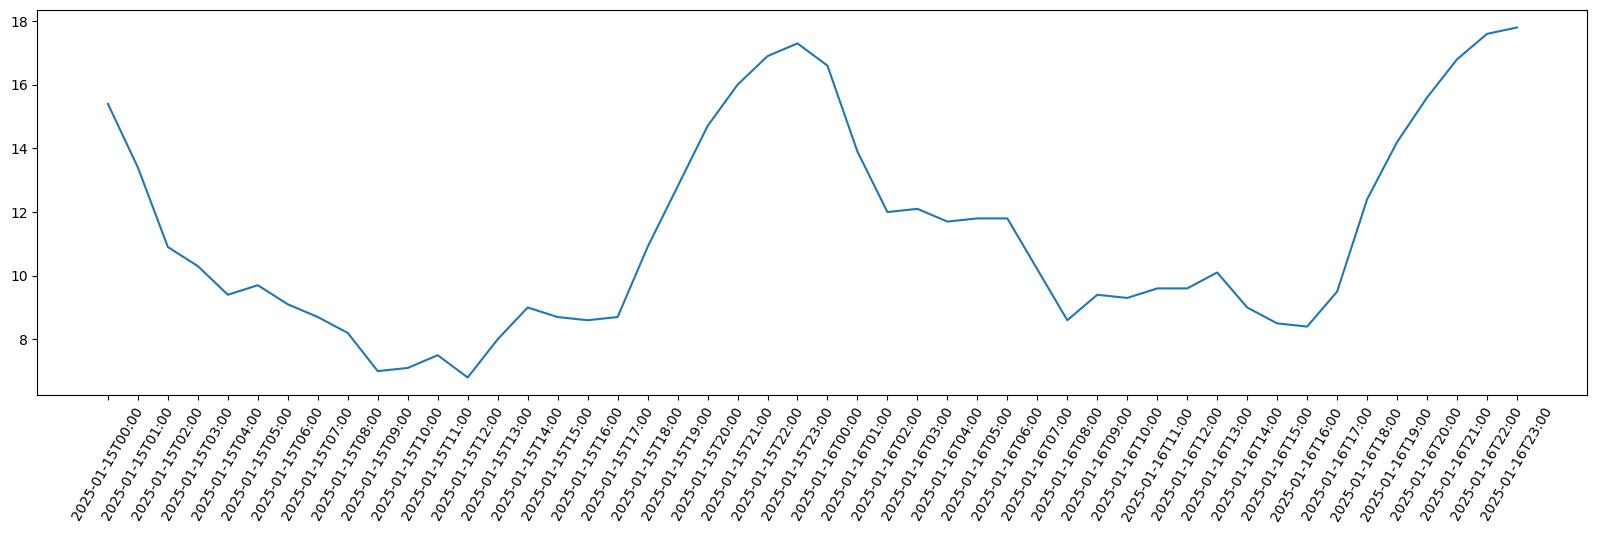

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(data['hourly']['time'][:24*2], data['hourly']['temperature_2m'][:24*2])
plt.xticks(rotation=60);

## Example: Pictures

In this example, we will use the [PicSum AI](https://picsum.photos/) to access some random pictures.
- The last two numbers in the URL represent the dimensions of the image, specifically the width and height in pixels.

In [59]:
url = 'https://picsum.photos/200/300'

- The response is an HTTPResponse object, and by using the read() method, we can convert the response content into a bytes object.

In [61]:
import urllib.request
response = urllib.request.urlopen(url)
response

Using the *imread()* method of plt response object is converted to an array.

In [63]:
import matplotlib.pyplot as plt
image_array = plt.imread(response, format="jpeg")

- The shape of this array is (300, 200, 3), and it is a 3-dimensional array. The third dimension represents the RGB color channels that will becovered in Numpy Arrays chapter. 

In [65]:
image_array.shape

(300, 200, 3)

In [66]:
image_array.ndim

3

In [67]:
image_array[:,:,0]

array([[136, 136, 136, ..., 192, 192, 192],
       [136, 136, 136, ..., 192, 192, 192],
       [135, 135, 135, ..., 191, 191, 191],
       ...,
       [ 56,  56,  56, ...,  47,  48,  49],
       [ 55,  55,  55, ...,  46,  48,  48],
       [ 53,  53,  53, ...,  46,  47,  48]], dtype=uint8)

In [68]:
image_array[:,:,0].shape

(300, 200)

- This picture can be displayed using the *imshow()* method.

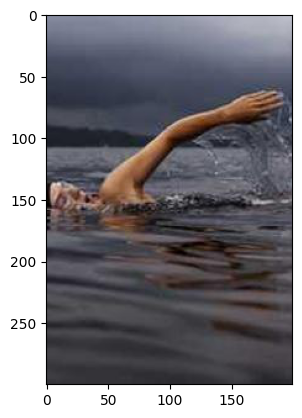

In [70]:
plt.imshow(image_array);

- This picture can be saved using the *imsave()* method.

In [117]:
plt.imsave('random_image.png', image_array)

## Example: API key

In this example, we will use the [OpenWeather](https://openweathermap.org/) to access weather data. 
- To proceed, you need to sign up and wait at least 2 hours for your account to be activated.
- Once activated, you will receive an API key to make data requests.
- First, we construct the URL by including the query parameters such as the city, API key, and measurement units (metric).

```python
city = "London"
api_key = "API KEY"
unit = "metric"

url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units={unit}'
url

- Similar to the previous example, the received data is in the form of a dictionary.

``` python
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())
data

``` python
{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 8.53,
  'feels_like': 7.93,
  'temp_min': 6.98,
  'temp_max': 9.44,
  'pressure': 1034,
  'humidity': 92,
  'sea_level': 1034,
  'grnd_level': 1030},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 200},
 'clouds': {'all': 100},
 'dt': 1736973275,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1736927957,
  'sunset': 1736958010},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

- Temperature

``` python
str(data['main']['temp']) 

``` python
'8.53'

- Latitude  

``` python
data['coord']['lat']

```python
51.5085

- Longitude 

``` python
data['coord']['lon']

``` python
-0.1257